<a href="https://colab.research.google.com/github/alvarischa/Classification/blob/main/Tugas_Sistem_Cerdas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
MODELS_DIR = 'models/'
if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)
MODEL_TF = MODELS_DIR + 'model'
MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'
MODEL_TFLITE = MODELS_DIR + 'model.tflite'
MODEL_TFLITE_MICRO = MODELS_DIR + 'model.cc'

In [ ]:
! pip install tensorflow==2.4.0rc0

In [ ]:
import tensorflow as tf

# Keras is TensorFlow's high-level API for deep learning
from tensorflow import keras
# Numpy is a math library
import numpy as np
# Pandas is a data manipulation library 
import pandas as pd
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
# Math is Python's math library
import math

In [ ]:
# Set seed for experiment reproducibility
seed = 1
np.random.seed(seed)

In [ ]:
# Number of sample datapoints
SAMPLES = 1000

# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(
    low=0, high=2*math.pi, size=SAMPLES).astype(np.float32)
#    low=-4, high=4, size=SAMPLES).astype(np.float32)


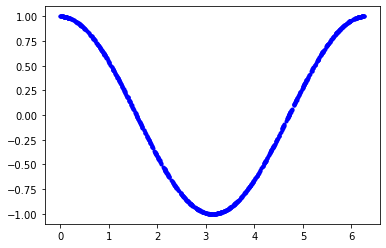

In [ ]:
# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

# Calculate the corresponding sine values
y_values = np.cos(x_values).astype(np.float32)

# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

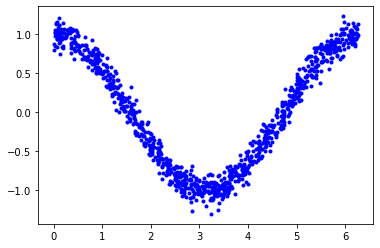

In [ ]:
# Add a small random number to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)

# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()


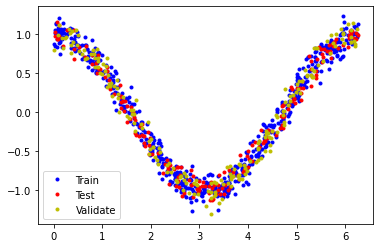

In [ ]:
# We'll use 60% of  data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT =  int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Use np.split to chop our data into three parts.
#The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.legend()
plt.show()

In [ ]:
# We'll use Keras to create a simple model architecture
model_1 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 8 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model_1.add(keras.layers.Dense(8, activation='relu', input_shape=(1,)))

# Final layer is a single neuron, since we want to output a single value
model_1.add(keras.layers.Dense(1))

# Compile the model using the standard 'adam' optimizer and the mean squared error or 'mse' loss function for regression.
model_1.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model on our training data while validating on our validation set
history_1 = model_1.fit(x_train, y_train, epochs=500, batch_size=64,
                        validation_data=(x_validate, y_validate))

Epoch 1/500
10/10 [==============================] - 1s 20ms/step - loss: 1.8498 - mae: 1.0141 - val_loss: 1.7336 - val_mae: 0.9890
Epoch 2/500
10/10 [==============================] - 0s 5ms/step - loss: 1.8674 - mae: 1.0310 - val_loss: 1.5420 - val_mae: 0.9285
Epoch 3/500
10/10 [==============================] - 0s 5ms/step - loss: 1.5206 - mae: 0.9208 - val_loss: 1.3739 - val_mae: 0.8763
Epoch 4/500
10/10 [==============================] - 0s 5ms/step - loss: 1.4362 - mae: 0.8986 - val_loss: 1.2249 - val_mae: 0.8300
Epoch 5/500
10/10 [==============================] - 0s 6ms/step - loss: 1.1858 - mae: 0.8222 - val_loss: 1.0964 - val_mae: 0.7906
Epoch 6/500
10/10 [==============================] - 0s 5ms/step - loss: 1.0827 - mae: 0.7952 - val_loss: 0.9865 - val_mae: 0.7587
Epoch 7/500
10/10 [==============================] - 0s 5ms/step - loss: 0.9549 - mae: 0.7595 - val_loss: 0.8927 - val_mae: 0.7326
Epoch 8/500
10/10 [==============================] - 0s 5ms/step - loss: 0.8965 - 

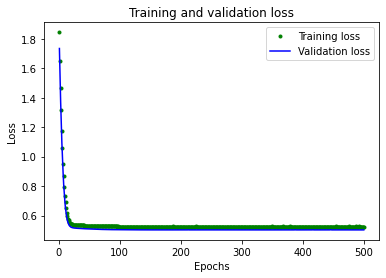

In [ ]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


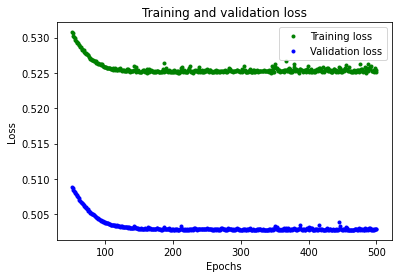

In [ ]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 50
plt.plot(epochs[SKIP:], train_loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


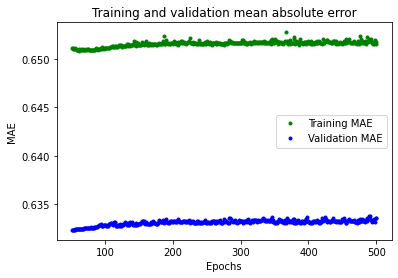

In [ ]:
plt.clf()

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
train_mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], train_mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

7/7 [==============================] - 0s 1ms/step - loss: 0.4914 - mae: 0.6185


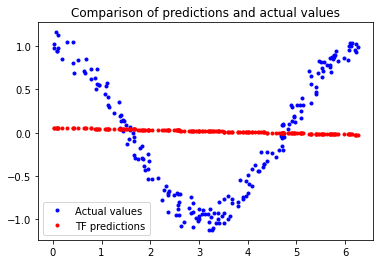

In [ ]:
# Calculate and print the loss on our test dataset
test_loss, test_mae = model_1.evaluate(x_test, y_test)

# Make predictions based on our test dataset
y_test_pred = model_1.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual values')
plt.plot(x_test, y_test_pred, 'r.', label='TF predictions')
plt.legend()
plt.show()

In [ ]:
model2 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model2.add(keras.layers.Dense(16, activation='relu', input_shape=(1,)))

# The new second and third layer will help the network learn more complex representations
model2.add(keras.layers.Dense(16, activation='relu'))

# Final layer is a single neuron, since we want to output a single value
model2.add(keras.layers.Dense(1))

# Compile the model using the standard 'adam' optimizer and the mean squared error or 'mse' loss function for regression.
model2.compile(optimizer='adam', loss="mse", metrics=["mae"])

# Train the model
history2 = model2.fit(x_train, y_train, epochs=500, batch_size=64,
                    validation_data=(x_validate, y_validate))

# Save the model to disk
model2.save(MODEL_TF)

Epoch 1/500
10/10 [==============================] - 1s 20ms/step - loss: 1.2138 - mae: 0.9699 - val_loss: 0.7176 - val_mae: 0.7201
Epoch 2/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6452 - mae: 0.6852 - val_loss: 0.5129 - val_mae: 0.6400
Epoch 3/500
10/10 [==============================] - 0s 6ms/step - loss: 0.5472 - mae: 0.6667 - val_loss: 0.5209 - val_mae: 0.6416
Epoch 4/500
10/10 [==============================] - 0s 6ms/step - loss: 0.5324 - mae: 0.6473 - val_loss: 0.5190 - val_mae: 0.6409
Epoch 5/500
10/10 [==============================] - 0s 5ms/step - loss: 0.5223 - mae: 0.6470 - val_loss: 0.5065 - val_mae: 0.6367
Epoch 6/500
10/10 [==============================] - 0s 5ms/step - loss: 0.5238 - mae: 0.6534 - val_loss: 0.5053 - val_mae: 0.6364
Epoch 7/500
10/10 [==============================] - 0s 5ms/step - loss: 0.5439 - mae: 0.6682 - val_loss: 0.5036 - val_mae: 0.6353
Epoch 8/500
10/10 [==============================] - 0s 5ms/step - loss: 0.5288 - 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer.py:1397: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: models/model/assets


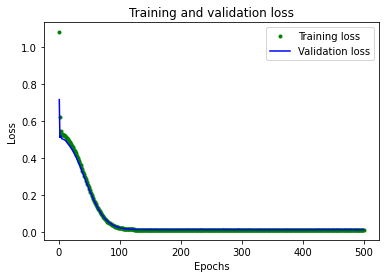

In [ ]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

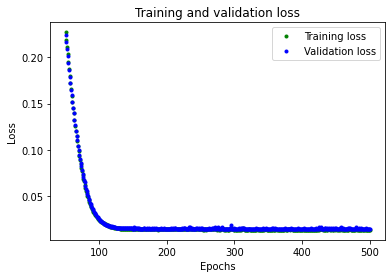

In [ ]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 50
plt.plot(epochs[SKIP:], train_loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

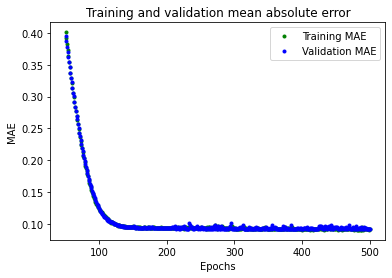

In [ ]:
plt.clf()

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
train_mae = history2.history['mae']
val_mae = history2.history['val_mae']

plt.plot(epochs[SKIP:], train_mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

7/7 [==============================] - 0s 2ms/step - loss: 0.0114 - mae: 0.0862


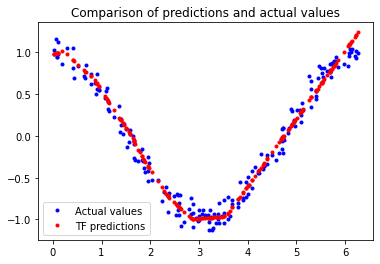

In [ ]:
# Calculate and print the loss on our test dataset
test_loss, test_mae = model2.evaluate(x_test, y_test)

# Make predictions based on our test dataset
y_test_pred = model2.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual values')
plt.plot(x_test, y_test_pred, 'r.', label='TF predictions')
plt.legend()
plt.show()

In [ ]:
model3 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model3.add(keras.layers.Dense(16, activation='relu', input_shape=(1,)))

# The new second and third layer will help the network learn more complex representations
model3.add(keras.layers.Dense(25, activation='relu'))

model3.add(keras.layers.Dense(10, activation='relu'))
model3.add(keras.layers.Dense(10, activation='relu'))

# Final layer is a single neuron, since we want to output a single value
model3.add(keras.layers.Dense(1))

# Compile the model using the standard 'adam' optimizer and the mean squared error or 'mse' loss function for regression.
model3.compile(optimizer='adam', loss="mse", metrics=["mae"])

# Train the model
history3 = model3.fit(x_train, y_train, epochs=300, batch_size=64,
                    validation_data=(x_validate, y_validate))

# Save the model to disk
model3.save(MODEL_TF)

Epoch 1/300
10/10 [==============================] - 1s 20ms/step - loss: 0.5769 - mae: 0.6805 - val_loss: 0.5027 - val_mae: 0.6345
Epoch 2/300
10/10 [==============================] - 0s 5ms/step - loss: 0.5308 - mae: 0.6597 - val_loss: 0.5018 - val_mae: 0.6331
Epoch 3/300
10/10 [==============================] - 0s 6ms/step - loss: 0.5277 - mae: 0.6565 - val_loss: 0.4927 - val_mae: 0.6276
Epoch 4/300
10/10 [==============================] - 0s 6ms/step - loss: 0.5037 - mae: 0.6414 - val_loss: 0.4812 - val_mae: 0.6200
Epoch 5/300
10/10 [==============================] - 0s 6ms/step - loss: 0.5098 - mae: 0.6398 - val_loss: 0.4642 - val_mae: 0.6071
Epoch 6/300
10/10 [==============================] - 0s 6ms/step - loss: 0.5079 - mae: 0.6431 - val_loss: 0.4476 - val_mae: 0.5958
Epoch 7/300
10/10 [==============================] - 0s 5ms/step - loss: 0.4646 - mae: 0.6112 - val_loss: 0.4294 - val_mae: 0.5826
Epoch 8/300
10/10 [==============================] - 0s 5ms/step - loss: 0.4421 - 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer.py:1397: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: models/model/assets


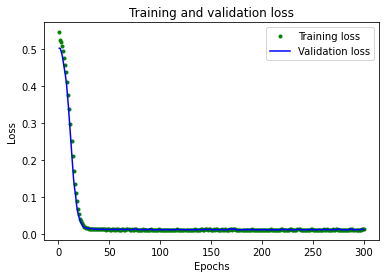

In [ ]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
train_loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

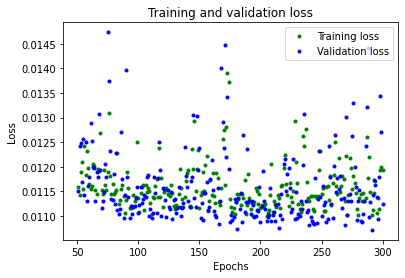

In [ ]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 50
plt.plot(epochs[SKIP:], train_loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

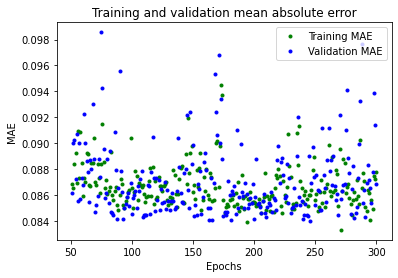

In [ ]:
plt.clf()

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
train_mae = history3.history['mae']
val_mae = history3.history['val_mae']

plt.plot(epochs[SKIP:], train_mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

7/7 [==============================] - 0s 1ms/step - loss: 0.0100 - mae: 0.0815


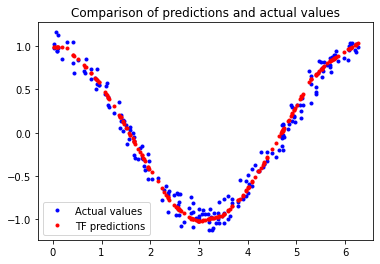

In [ ]:
# Calculate and print the loss on our test dataset
test_loss, test_mae = model3.evaluate(x_test, y_test)

# Make predictions based on our test dataset
y_test_pred = model3.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual values')
plt.plot(x_test, y_test_pred, 'r.', label='TF predictions')
plt.legend()
plt.show()